In [7]:
# Import some common packages
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import urllib

# Import ML packages
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix # optional
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# Suppress warnings
warnings.filterwarnings("ignore")

# To make this notebook's output stable across runs
np.random.seed(42)

print("Done importing libraries and setting up Notebook.")


Done importing libraries and setting up Notebook.


In [8]:
import fitbit
import gather_keys_oauth2 as Oauth2
import datetime

CLIENT_ID = '22D58G'
CLIENT_SECRET = 'd8ac577afd3ce45529ca435a41a755ab'

server = Oauth2.OAuth2Server(CLIENT_ID, CLIENT_SECRET)
server.browser_authorize()

ACCESS_TOKEN = str(server.fitbit.client.session.token['access_token'])
REFRESH_TOKEN = str(server.fitbit.client.session.token['refresh_token'])

auth2_client = fitbit.Fitbit(CLIENT_ID, CLIENT_SECRET, oauth2=True, access_token=ACCESS_TOKEN, refresh_token=REFRESH_TOKEN)

[04/Nov/2018:00:50:44] ENGINE Listening for SIGHUP.
[04/Nov/2018:00:50:44] ENGINE Listening for SIGTERM.
[04/Nov/2018:00:50:44] ENGINE Listening for SIGUSR1.
[04/Nov/2018:00:50:44] ENGINE Bus STARTING
[04/Nov/2018:00:50:44] ENGINE Started monitor thread 'Autoreloader'.
[04/Nov/2018:00:50:44] ENGINE Serving on http://127.0.0.1:8080
[04/Nov/2018:00:50:44] ENGINE Bus STARTED


127.0.0.1 - - [04/Nov/2018:00:50:46] "GET /?code=06df1c1572572b3bf8554fec633c5d692fe92137&state=gURiM3diXQeOEbiEdQhFLWUZIREmxI HTTP/1.1" 200 122 "" "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:63.0) Gecko/20100101 Firefox/63.0"
127.0.0.1 - - [04/Nov/2018:00:50:46] "GET /favicon.ico HTTP/1.1" 304 - "" "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:63.0) Gecko/20100101 Firefox/63.0"


[04/Nov/2018:00:50:47] ENGINE Bus STOPPING
[04/Nov/2018:00:50:52] ENGINE HTTP Server cherrypy._cpwsgi_server.CPWSGIServer(('127.0.0.1', 8080)) shut down
[04/Nov/2018:00:50:52] ENGINE Stopped thread 'Autoreloader'.
[04/Nov/2018:00:50:52] ENGINE Bus STOPPED
[04/Nov/2018:00:50:52] ENGINE Bus EXITING
[04/Nov/2018:00:50:52] ENGINE Bus EXITED
[04/Nov/2018:00:50:52] ENGINE Waiting for child threads to terminate...


In [9]:
startDate = '2018-01-01'
endDate = '2018-10-31'

ActivitiesTracker = [
'activities/tracker/calories',
'activities/tracker/steps',
'activities/tracker/distance',
'activities/tracker/minutesSedentary',
'activities/tracker/minutesLightlyActive',
'activities/tracker/minutesFairlyActive',
'activities/tracker/minutesVeryActive',
]

MasterDF = pd.DataFrame()

for activityItem in ActivitiesTracker:
    activity = str(activityItem.split('/')[2].capitalize())
    print('Starting' + activity)
    activityDF = pd.DataFrame(columns=['Date', activity])
    activityStats = auth2_client.time_series(activityItem, base_date=startDate, end_date=endDate)

    date_list = []
    val_list = []
    for j in activityStats[activityItem.split('/')[0] + '-' + activityItem.split('/')[1] + '-' + activityItem.split('/')[2]]:     
        date_list.append(j['dateTime'])
        val_list.append(j['value'])    
    activityDF = pd.DataFrame({'Date':date_list, activity:val_list})
    #print(activityDF)
    activityDF.to_csv(activity + '.csv', columns = ['Date', activity], header = True, index = False)
    print(activity + ' is done!')
    
    MasterDF['Date'] = date_list
    MasterDF[activity] = val_list




StartingCalories
Calories is done!
StartingSteps
Steps is done!
StartingDistance
Distance is done!
StartingMinutessedentary
Minutessedentary is done!
StartingMinuteslightlyactive
Minuteslightlyactive is done!
StartingMinutesfairlyactive
Minutesfairlyactive is done!
StartingMinutesveryactive
Minutesveryactive is done!


In [10]:

fitData = pd.read_csv('MasterDatabase.csv')
fitData.head()
fitData.describe()
fitData.info()

#print(ActivitesDF)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 11 columns):
Unnamed: 0              304 non-null int64
Date                    304 non-null object
Calories                304 non-null int64
Steps                   304 non-null int64
Distance                304 non-null float64
Minutessedentary        304 non-null int64
Minuteslightlyactive    304 non-null int64
Minutesfairlyactive     304 non-null int64
Minutesveryactive       304 non-null int64
Minutes Asleep          222 non-null object
Week Day                304 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 26.2+ KB


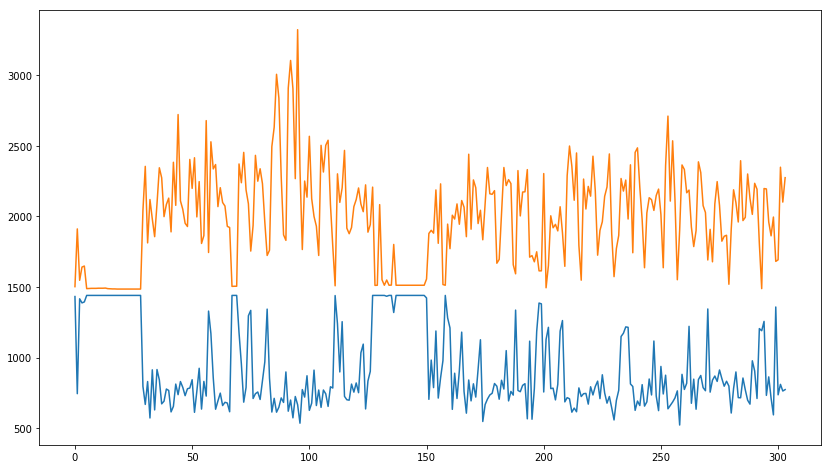

In [11]:
fitData['Minutessedentary'].plot(figsize = (14, 8))
fitData['Calories'].plot(figsize = (14, 8))

In [12]:
sleepData = pd.read_csv('All_sleep_data.csv')
sleepData.head()
#sleepData.describe()
#sleepData.info()

,Unnamed: 0,Unnamed: 0.1,Date,Minutes Asleep
0,0,0,2018-01-02,510
1,1,1,2018-01-30,463
2,2,2,2018-01-31,479
3,3,3,2018-02-01,465
4,4,4,2018-02-02,624


In [15]:
MasterDF['Minutes Asleep'] = pd.Series()
for i in sleepData['Date']:
    masterIndex = pd.Index(MasterDF['Date']).get_loc(i)
    MasterDF['Minutes Asleep'][masterIndex] = sleepData['Minutes Asleep'][pd.Index(sleepData['Date']).get_loc(i)]

In [16]:
daysOfTheWeek = pd.read_csv('WeekDays.csv')
daysOfTheWeek.head()
#daysOfTheWeek.describe()
#daysOfTheWeek.info()

,Unnamed: 0,Date,Week Day
0,0,2018-1-1,Monday
1,1,2018-1-2,Tuesday
2,2,2018-1-3,Wednesday
3,3,2018-1-4,Thursday
4,4,2018-1-5,Friday


In [21]:
MasterDF['Week Day'] = daysOfTheWeek['Week Day']

,Date,Calories,Steps,Distance,Minutessedentary,Minuteslightlyactive,Minutesfairlyactive,Minutesveryactive,Minutes Asleep,Week Day
0,2018-01-01,1502,80,0.03325578619584,1432,8,0,0,NaN,Monday
1,2018-01-02,1911,4995,2.0764050437468,744,158,9,3,510.0,Tuesday
2,2018-01-03,1547,540,0.22447655682192,1416,24,0,0,NaN,Wednesday
3,2018-01-04,1641,2306,0.95859555161032,1387,23,28,2,NaN,Thursday
4,2018-01-05,1648,2516,1.0458919903744,1394,46,0,0,NaN,Friday
5,2018-01-06,1488,0,0.0,1440,0,0,0,NaN,Saturday
6,2018-01-07,1489,0,0.0,1440,0,0,0,NaN,Sunday
7,2018-01-08,1490,0,0.0,1440,0,0,0,NaN,Monday
8,2018-01-09,1490,0,0.0,1440,0,0,0,NaN,Tuesday
9,2018-01-10,1490,0,0.0,1440,0,0,0,NaN,Wednesday


In [18]:
MasterDF.to_csv("MasterDatabase.csv")